# About This Notebook


This notebook is focused on doing data analysis on data compiled from the National Center for Education Statistics, the US Census, and National Assessment of Educational Progress test data. 

The purpose of this data analysis is to try and identify correlations between test performance and other data that could identify areas for further research or give education workers at the district/state level additional information they could use to make future budget allocations. 

# Preface

How can we create a better outcome for each child in America?

Research needs to be done to understand potential drivers of inequal outcomes in our schools.

Education stakeholders at the district and state levels can use this exploratory correlation analysis to identify further areas of research. 



# Setting Up

In [ ]:
# import & alias modules
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
sns.set()

In [ ]:
# Download link to files: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

# After downloading the dataset, load the states_all.csv into the notebook using colab's upload method 
# and selecting the file from your computer. 
from google.colab import files
uploaded = files.upload()

Saving states_all.csv to states_all (1).csv


In [ ]:
#read in data
import io
df = pd.read_csv(io.BytesIO(uploaded['states_all.csv']))

df.info() # see the information for our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [ ]:
df.head()

NameError: ignored

Knowing that the data is all discrete, whole-number data (minus the state/year data), testing statistical correlation is the most effective way to gain insight into the data.

# Hypothesis and Testing Methodology

I have initial hypotheses about this dataset that I will use to frame the analysis moving forward. 



**h0: There is no correlation between reading test scores and any category of revenue.**

*ha: There is a correlation between reading test scores and any category of revenue.*

**h0: There is no correlation between math test scores and any category of expenditure.**

*ha: There is a correlation between math test scores and any category of expenditure.*



Both of these hypotheses will be tested through correlation testing with initial data then comparing it to identical testing with any outliers removed (if necessary).

# Creating our Reading Test Scores Dataframe

We need to create a dataframe with clean data to test. The easiest way to do this is to filter out nulls in our target variables and see if we have enough clean data to perform an analysis.

In [ ]:
df_reading = df.dropna(subset=['LOCAL_REVENUE', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']) 
#creating specific dataframe to filter out nulls in desired testing variables

df_reading.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 306 to 1223
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   436 non-null    object 
 1   STATE                         436 non-null    object 
 2   YEAR                          436 non-null    int64  
 3   ENROLL                        436 non-null    float64
 4   TOTAL_REVENUE                 436 non-null    float64
 5   FEDERAL_REVENUE               436 non-null    float64
 6   STATE_REVENUE                 436 non-null    float64
 7   LOCAL_REVENUE                 436 non-null    float64
 8   TOTAL_EXPENDITURE             436 non-null    float64
 9   INSTRUCTION_EXPENDITURE       436 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  436 non-null    float64
 11  OTHER_EXPENDITURE             436 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    436 non-null    float64
 13  GR

In [ ]:
df_reading.isnull().sum() # double-checking results from .info()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                           0
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE                0
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      3
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                     0
GRADES_9_12_G                    0
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                79
AVG_MATH_8_SCORE                79
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64

Because the financial data is not on a per-student basis but the test scores are averaged from all students' scores, we need to adjust the data by creating per-student equivalents using the estimated student counts within each state. 

In [ ]:
df_reading['local_revenue_per_student'] = df_reading.LOCAL_REVENUE / df_reading.GRADES_ALL_G
df_reading['federal_revenue_per_student'] = df_reading.FEDERAL_REVENUE / df_reading.GRADES_ALL_G
df_reading['state_revenue_per_student'] = df_reading.STATE_REVENUE / df_reading.GRADES_ALL_G
df_reading['total_revenue_per_student'] = df_reading.TOTAL_REVENUE / df_reading.GRADES_ALL_G
df_reading.head() #confirming that our calculated variables are being added to the dataframe correctly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,local_revenue_per_student,federal_revenue_per_student,state_revenue_per_student,total_revenue_per_student
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,1155492.0,357731.0,458351.0,10341.0,58055.0,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0,1.572990,0.500218,3.462417,5.535625
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,1315931.0,279785.0,759108.0,5209.0,65312.0,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0,2.598368,0.554543,2.358706,5.511618
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,731619.0,170279.0,192590.0,1390.0,34120.0,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0,1.847374,0.500767,3.328688,5.676829
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,10939061.0,1862674.0,4335730.0,81926.0,459262.0,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,2.226321,0.531428,3.854262,6.612010
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,1470619.0,158788.0,622534.0,13068.0,50859.0,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0,3.238430,0.307624,2.688823,6.234877


The data count is high enough to perform correlation analysis within each category!

# Reading Scores vs. Revenues Analysis

Next, we need to do a "first look" at the histograms and plots of data we're interested in: revenue numbers and how they map together with reading test scores. 

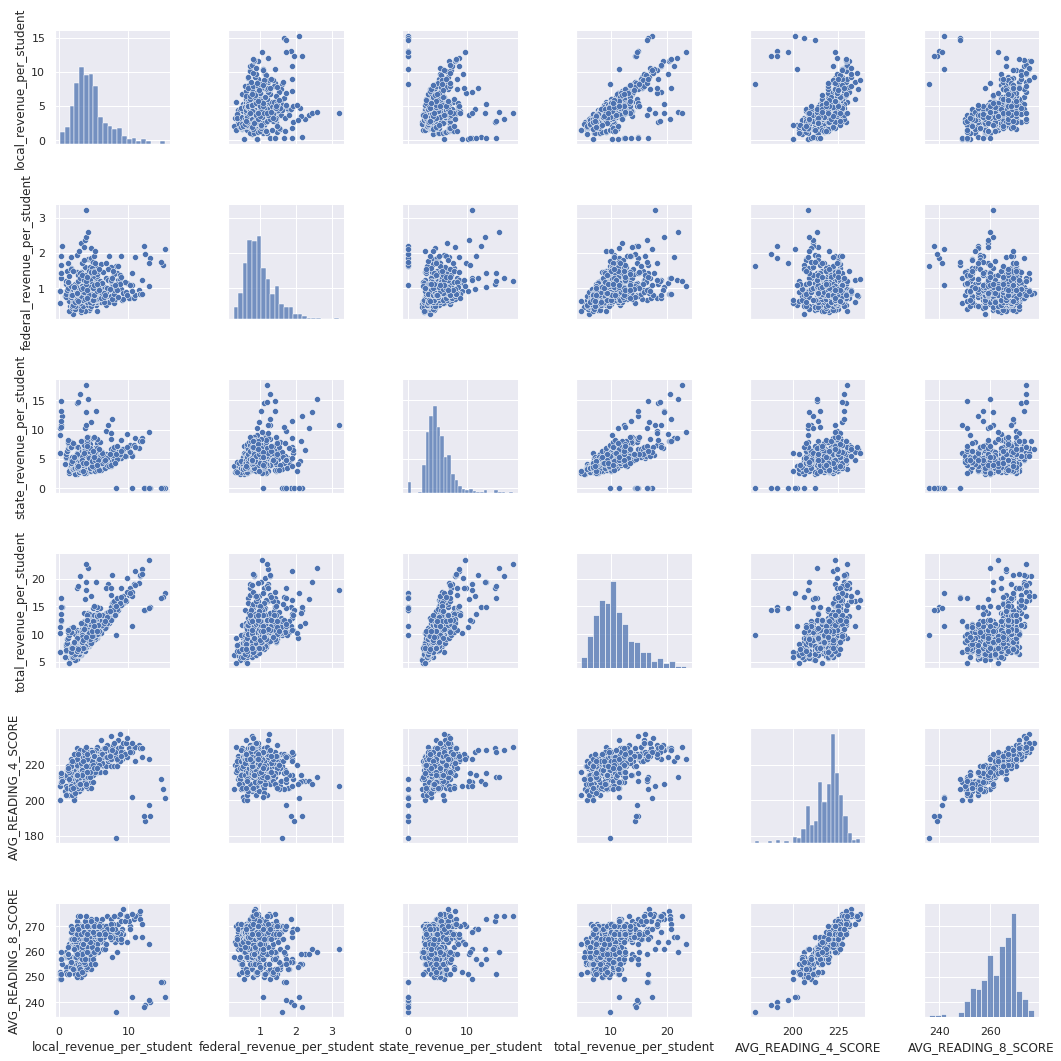

In [ ]:
sns.pairplot(df_reading, vars=['local_revenue_per_student' ,'federal_revenue_per_student', 'state_revenue_per_student', 'total_revenue_per_student', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'])

The plots we're interested in here are the last two rows 
and the histograms. Some of the scatterplots have clear outliers with the rest of the data being pretty closely grouped together, and the histograms have mostly normal distributions with fairly small tails. 

## 4th Grade Reading Data
At our first glance at revenue values compared to 4th grade reading test scores, they all initially look like they have minor correlations.

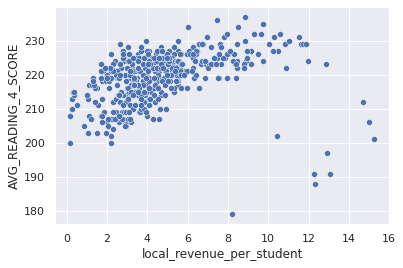

In [ ]:
sns.scatterplot(x='local_revenue_per_student', y='AVG_READING_4_SCORE',  data=df_reading)

This first plot has some outliers that we'll look at more closely to see whether we should run a separate correlation test with that data removed.

In [ ]:
filter_test = df_reading[(df_reading['AVG_READING_4_SCORE'] < 215) & (df_reading['AVG_READING_8_SCORE'] < 250) & (df_reading['local_revenue_per_student'] > 8)]
#filter for grade 4 and grade 8 plots being created simultaneously
filter_test

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,local_revenue_per_student,federal_revenue_per_student,state_revenue_per_student,total_revenue_per_student
314,1998_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1998,77111.0,706938.0,116366.0,0.0,590572.0,716740.0,283484.0,339972.0,33393.0,59891.0,4831.0,6446.0,5607.0,4083.0,2572.0,42997.0,13932.0,71889.0,NaN,NaN,179.0,236.0,8.215054,1.618690,0.0,9.833744
518,2002_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2002,68449.0,1138126.0,141514.0,0.0,996612.0,1145684.0,452905.0,431693.0,42192.0,218894.0,4703.0,5475.0,6078.0,4605.0,3008.0,45011.0,15374.0,76166.0,NaN,NaN,191.0,240.0,13.084736,1.857968,0.0,14.942704
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,406078.0,32193.0,194278.0,5168.0,5659.0,5920.0,5158.0,2971.0,45706.0,16828.0,78057.0,205.0,243.0,188.0,239.0,12.317435,1.954969,0.0,14.272404
671,2005_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2005,62306.0,1109605.0,167922.0,0.0,941683.0,1085658.0,459063.0,450060.0,38671.0,134417.0,5499.0,5545.0,5003.0,5196.0,3177.0,41142.0,18769.0,76876.0,211.0,245.0,191.0,238.0,12.249376,2.184323,0.0,14.433698
773,2007_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2007,56943.0,1148358.0,134700.0,0.0,1013658.0,1140506.0,491992.0,437772.0,40703.0,167103.0,7146.0,5306.0,4807.0,5182.0,4002.0,40295.0,20242.0,78422.0,214.0,248.0,197.0,241.0,12.925684,1.717630,0.0,14.643314
875,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,370127.0,38514.0,66023.0,8499.0,5190.0,4893.0,4452.0,3301.0,37698.0,17597.0,69433.0,219.0,254.0,202.0,242.0,10.443910,1.092506,0.0,11.536416
977,2011_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2011,44199.0,1283071.0,155505.0,0.0,1127566.0,1297175.0,525185.0,389526.0,56132.0,326332.0,10831.0,6358.0,4643.0,4328.0,3190.0,38259.0,17261.0,73911.0,222.0,260.0,201.0,242.0,15.255726,2.103949,0.0,17.359676
1079,2013_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2013,44179.0,1300036.0,129874.0,0.0,1170162.0,1308438.0,559940.0,332997.0,39825.0,375676.0,11867.0,7174.0,4826.0,4425.0,3326.0,41239.0,17717.0,78153.0,229.0,265.0,206.0,248.0,14.972707,1.661792,0.0,16.634499
1181,2015_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2015,46155.0,1382282.0,146366.0,0.0,1235916.0,1360942.0,557345.0,379854.0,41841.0,381902.0,12316.0,7319.0,5701.0,4430.0,3867.0,44996.0,18884.0,84024.0,231.0,263.0,212.0,248.0,14.709083,1.741955,0.0,16.451038


After seeing that all the high local revenue/low score areas are from Washington DC, it's worthwhile to run both an unfiltered and filtered correlation to see what the differences in results might be.

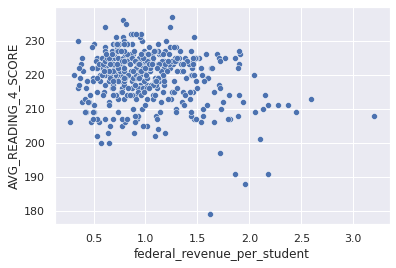

In [ ]:
sns.scatterplot(x='federal_revenue_per_student', y='AVG_READING_4_SCORE',  data=df_reading)

These outliers don't seem to be far enough outside the norm to consider being removed, so we'll run correlation tests on this data the way it is.

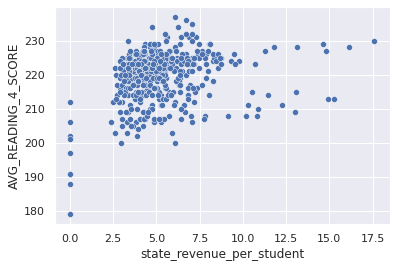

In [ ]:
sns.scatterplot(x='state_revenue_per_student', y='AVG_READING_4_SCORE',  data=df_reading)

After removing the line of dots on the far left (from Washington DC, which has no state revenue), this data will be ready to do analysis on.

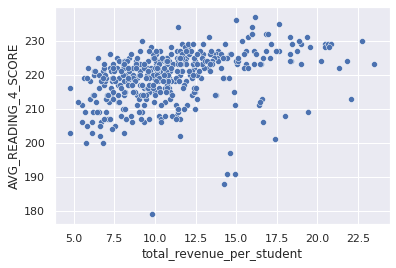

In [ ]:
sns.scatterplot(x='total_revenue_per_student', y='AVG_READING_4_SCORE',  data=df_reading)

This data also doesn't have any outliers that we need to remove for clearer analysis.

## 8th Grade Reading Data
The data for 8th grade testing has a lot of similarities to 4th grade testing (similar revenue-based outliers), but tends to be slightly less grouped together.

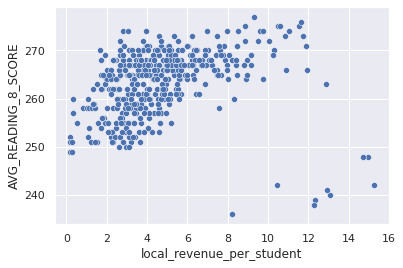

In [ ]:
sns.scatterplot(x='local_revenue_per_student', y='AVG_READING_8_SCORE', data=df_reading)

Here, we have the same Washington DC data that needs to be filtered out.

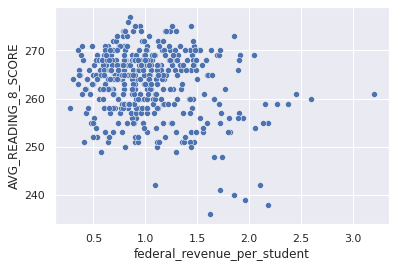

In [ ]:
sns.scatterplot(x='federal_revenue_per_student', y='AVG_READING_8_SCORE',  data=df_reading)

There is a general trend of higher dispersion within the 8th grade data (as the revenue figures stay the same, but the test scores are slightly more widely distributed).

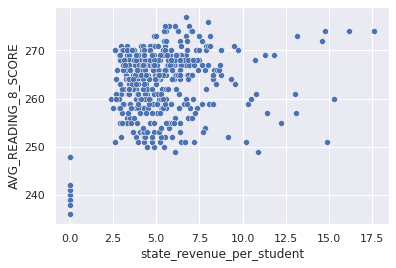

In [ ]:
sns.scatterplot(x='state_revenue_per_student', y='AVG_READING_8_SCORE',  data=df_reading)

Washington DC does not have state revenue.

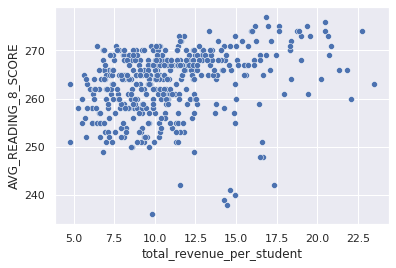

In [ ]:
sns.scatterplot(x='total_revenue_per_student', y='AVG_READING_8_SCORE', data=df_reading)

Uncovering the outliers in data that come from Washington DC is a worthwhile subject to dig deeper into to try to understand this in the future, but it's also outside the scope of this dataset to understand why this disparity exists.

## Unfiltered Statistics

Next step is to run the correlations and get an idea of what we're looking at. 

In [ ]:
r_l_4 = stats.pearsonr(df_reading['local_revenue_per_student'], df_reading['AVG_READING_4_SCORE'])
print(r_l_4)

(0.29582052780101326, 2.9621609788209336e-10)


In [ ]:
r_s_4 = stats.pearsonr(df_reading['state_revenue_per_student'], df_reading['AVG_READING_4_SCORE'])
print(r_s_4)

(0.28889352691342607, 7.921268436255796e-10)


In [ ]:
r_f_4 = stats.pearsonr(df_reading['federal_revenue_per_student'], df_reading['AVG_READING_4_SCORE'])
print(r_f_4)

(-0.19890021735783078, 2.87556026957758e-05)


In [ ]:
r_t_4 = stats.pearsonr(df_reading['total_revenue_per_student'], df_reading['AVG_READING_4_SCORE'])
print(r_t_4)

(0.38680675211357757, 5.200570177353309e-17)


In [ ]:
r_l_8 = stats.pearsonr(df_reading['local_revenue_per_student'], df_reading['AVG_READING_8_SCORE'])
print(r_l_8)

(0.2368244021770123, 5.66864340170383e-07)


In [ ]:
r_s_8 = stats.pearsonr(df_reading['state_revenue_per_student'], df_reading['AVG_READING_8_SCORE'])
print(r_s_8)

(0.2483759203663643, 1.4890675776560705e-07)


In [ ]:
r_f_8 = stats.pearsonr(df_reading['federal_revenue_per_student'], df_reading['AVG_READING_8_SCORE'])
print(r_f_8)

(-0.2091695230550947, 1.0634270349327645e-05)


In [ ]:
r_t_8 = stats.pearsonr(df_reading['total_revenue_per_student'], df_reading['AVG_READING_8_SCORE'])
print(r_t_8)

(0.3150910215135623, 1.6658656121879903e-11)


These stats suggest a fairly strong and highly significant correlation between revenue and reading test scores (with federal money not having any connection to performance at all). 

However, I want to look at the effect the outliers from Washington DC are having on the statistics (including the categories where the DC stats aren't necessarily outliers). This means we need to create a filtered dataframe, then run the same tests on it.

In [ ]:
filtered_df_reading = df_reading[(df_reading['STATE'] != 'DISTRICT_OF_COLUMBIA')]
filtered_df_reading.info() #confirming that we've removed our 9 Washington DC data rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 306 to 1223
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   427 non-null    object 
 1   STATE                         427 non-null    object 
 2   YEAR                          427 non-null    int64  
 3   ENROLL                        427 non-null    float64
 4   TOTAL_REVENUE                 427 non-null    float64
 5   FEDERAL_REVENUE               427 non-null    float64
 6   STATE_REVENUE                 427 non-null    float64
 7   LOCAL_REVENUE                 427 non-null    float64
 8   TOTAL_EXPENDITURE             427 non-null    float64
 9   INSTRUCTION_EXPENDITURE       427 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  427 non-null    float64
 11  OTHER_EXPENDITURE             427 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    427 non-null    float64
 13  GR

## Filtered Statistics

In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['local_revenue_per_student'], filtered_df_reading['AVG_READING_4_SCORE']),  '\nold:', r_l_4)

new: (0.6090548845112357, 1.0520554765587057e-44) 
old: (0.29582052780101326, 2.9621609788209336e-10)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['state_revenue_per_student'], filtered_df_reading['AVG_READING_4_SCORE']), '\nold:', r_s_4)

new: (0.17432411874974138, 0.00029526273567563295) 
old: (0.28889352691342607, 7.921268436255796e-10)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['federal_revenue_per_student'], filtered_df_reading['AVG_READING_4_SCORE']), '\nold:', r_f_4)

new: (-0.09505950392680572, 0.04964656566711255) 
old: (-0.19890021735783078, 2.87556026957758e-05)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['total_revenue_per_student'], filtered_df_reading['AVG_READING_4_SCORE']), '\nold:', r_t_4)

new: (0.5041767339383356, 6.530529441737996e-29) 
old: (0.38680675211357757, 5.200570177353309e-17)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['local_revenue_per_student'], filtered_df_reading['AVG_READING_8_SCORE']), '\nold:', r_l_8)

new: (0.5621446076152018, 6.0814091539738565e-37) 
old: (0.2368244021770123, 5.66864340170383e-07)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['state_revenue_per_student'], filtered_df_reading['AVG_READING_8_SCORE']), '\nold:', r_s_8)

new: (0.11381200233940757, 0.018644503897902745) 
old: (0.2483759203663643, 1.4890675776560705e-07)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['federal_revenue_per_student'], filtered_df_reading['AVG_READING_8_SCORE']), '\nold:', r_f_8)

new: (-0.10039427784318038, 0.03810665557644619) 
old: (-0.2091695230550947, 1.0634270349327645e-05)


In [ ]:
print('new:', stats.pearsonr(filtered_df_reading['total_revenue_per_student'], filtered_df_reading['AVG_READING_8_SCORE']), '\nold:', r_t_8)

new: (0.4338910088916086, 4.974739146730425e-21) 
old: (0.3150910215135623, 1.6658656121879903e-11)


Knowing that Washington DC is having a significant effect on the strength of the correlation and that these results are still statistically significant using both the filtered and unfiltered data, the correlation between local revenues (which mostly come from property taxes) and reading test scores is definitely significant. Further data is needed to understand the situation within DC.

## Reading Conclusions

*We can reject our first null hypothesis because all discovered correlations were statistically significant.* 

These results demonstrate that the correlation between total funding and reading test scores is positive and significant, and that local funding is the most significant factor of that demonstrated correlation. 

The fact that local revenue has a stronger correlation to higher test scores than overall revenue suggests that there are factors associated with higher local revenue that are significant to kids' test performance that need to be studied further. (As a former teacher, I believe that people who live in higher property value areas are better equipped to help their children learn to read: this is just one possible explanation of many.)

It is also worth mentioning that federal funding is not associated with performance improvement, which is worth diving depeer into as more data becomes available. 

# Creating our Math Test Scores Dataframe

We need to follow a similar process to create a clean dataframe to do analysis on for our math and expenditure correlation tests.

In [ ]:
df_math = df.dropna(subset=['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE'])
df_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 408 to 1223
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   397 non-null    object 
 1   STATE                         397 non-null    object 
 2   YEAR                          397 non-null    int64  
 3   ENROLL                        397 non-null    float64
 4   TOTAL_REVENUE                 397 non-null    float64
 5   FEDERAL_REVENUE               397 non-null    float64
 6   STATE_REVENUE                 397 non-null    float64
 7   LOCAL_REVENUE                 397 non-null    float64
 8   TOTAL_EXPENDITURE             397 non-null    float64
 9   INSTRUCTION_EXPENDITURE       397 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  397 non-null    float64
 11  OTHER_EXPENDITURE             397 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    397 non-null    float64
 13  GR

In [ ]:
df_math.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                           0
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE                0
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      3
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                     0
GRADES_9_12_G                    0
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE             40
AVG_READING_8_SCORE             40
dtype: int64

Again, because the financial data is not on a per-student basis but the test scores are averaged from all students' scores, we need to adjust the data by creating per-student equivalents using the estimated student counts within each state. 

In [ ]:
df_math['t_expenditure_per_student'] = df_math.TOTAL_EXPENDITURE / df_math.GRADES_ALL_G
df_math['i_expenditure_per_student'] = df_math.INSTRUCTION_EXPENDITURE / df_math.GRADES_ALL_G
df_math['ss_expenditure_per_student'] = df_math.SUPPORT_SERVICES_EXPENDITURE / df_math.GRADES_ALL_G
df_math['o_expenditure_per_student'] = df_math.OTHER_EXPENDITURE / df_math.GRADES_ALL_G
df_math['co_expenditure_per_student'] = df_math.CAPITAL_OUTLAY_EXPENDITURE / df_math.GRADES_ALL_G
df_math.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,t_expenditure_per_student,i_expenditure_per_student,ss_expenditure_per_student,o_expenditure_per_student,co_expenditure_per_student
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,395909.0,663903.0,10836.0,55112.0,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.0,264.0,NaN,NaN,6.761245,3.448298,1.782523,0.535018,0.897176
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,1573568.0,270671.0,768425.0,2037.0,68347.0,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,219.0,269.0,NaN,NaN,6.149275,2.835756,1.792839,0.308388,0.875502
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,804253.0,138220.0,146666.0,2001.0,33941.0,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,216.0,257.0,NaN,NaN,5.963654,3.403048,1.787392,0.307184,0.325954
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,12429070.0,2269603.0,5849441.0,89919.0,459771.0,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN,7.463140,3.829197,2.024010,0.369593,0.952551
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,1634888.0,180639.0,369278.0,10484.0,41570.0,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.0,281.0,NaN,NaN,9.970632,5.672789,2.908127,0.321319,0.656869


Now that we have a new dataframe, we can run our correlation tests!

# Math Scores vs. Expenditures Analysis

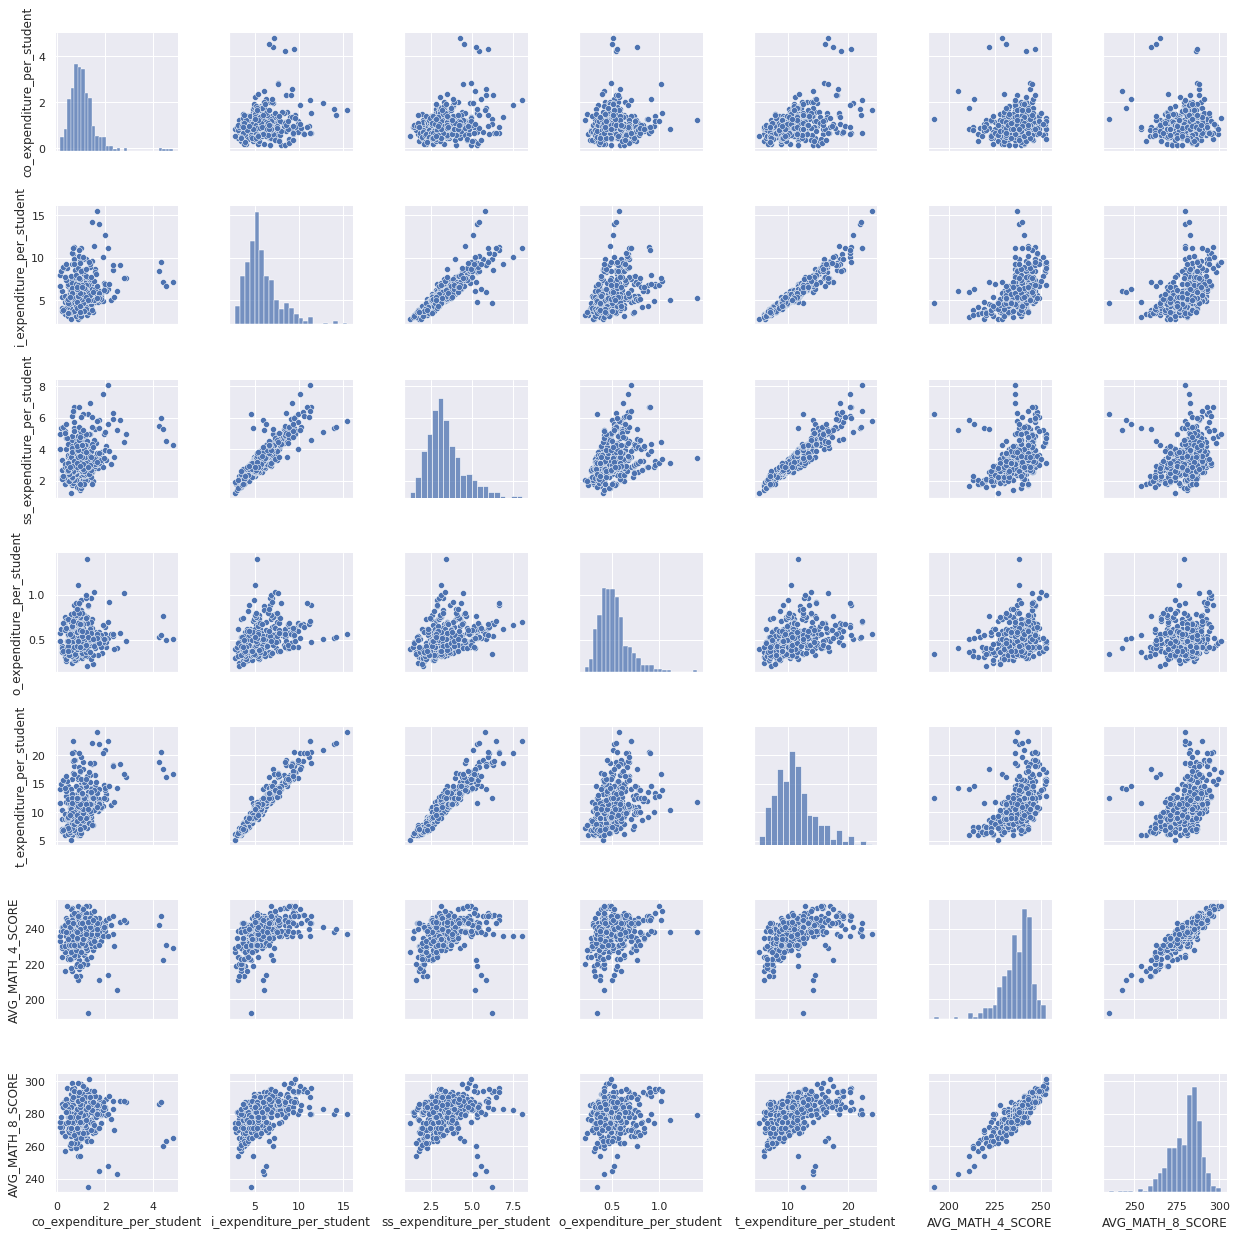

In [ ]:
sns.pairplot(df_math, vars=['co_expenditure_per_student', 'i_expenditure_per_student', 'ss_expenditure_per_student', 'o_expenditure_per_student', 't_expenditure_per_student', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE'])

Checking our histograms ensures that our data is mostly normal (slight tails) and looking at the last two rows of plots lets us get an initial impression. 

## 4th Grade Math Data

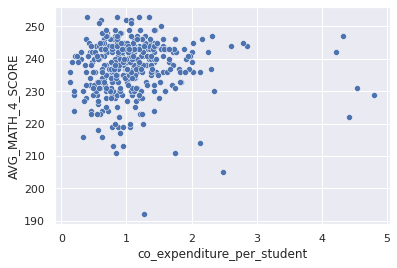

In [ ]:
sns.scatterplot(x = 'co_expenditure_per_student', y='AVG_MATH_4_SCORE', data=df_math)

Similar to the reading dataframe, I'd like to understand the highly dispersed data points are coming from to see if there is a reason to remove them from the dataframe. 

In [ ]:
filter_test_co = df_math[(df_math['co_expenditure_per_student'] > 4)], df_math[(df_math['AVG_MATH_4_SCORE'] < 210)]
filter_test_co

(                    PRIMARY_KEY  ... co_expenditure_per_student
 917                2009_WYOMING  ...                   4.225591
 977   2011_DISTRICT_OF_COLUMBIA  ...                   4.415202
 1079  2013_DISTRICT_OF_COLUMBIA  ...                   4.806930
 1181  2015_DISTRICT_OF_COLUMBIA  ...                   4.545154
 1223               2015_WYOMING  ...                   4.322614
 
 [5 rows x 30 columns],
                    PRIMARY_KEY  ... co_expenditure_per_student
 416  2000_DISTRICT_OF_COLUMBIA  ...                   1.270207
 569  2003_DISTRICT_OF_COLUMBIA  ...                   2.488925
 
 [2 rows x 30 columns])

These data points are a representative part of the sample and therefore should be included; however, if there are any data points that are consistently outside the norm in multiple variables, a comparative analysis could be run with those points removed.

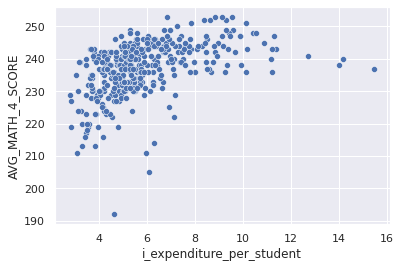

In [ ]:
sns.scatterplot(x = 'i_expenditure_per_student', y='AVG_MATH_4_SCORE', data=df_math)

In [ ]:
filter_test_i =  df_math[(df_math['i_expenditure_per_student'] > 12)], df_math[(df_math['AVG_MATH_4_SCORE'] < 200)]
filter_test_i

(        PRIMARY_KEY  ... co_expenditure_per_student
 899   2009_NEW_YORK  ...                   1.975277
 1001  2011_NEW_YORK  ...                   1.720624
 1103  2013_NEW_YORK  ...                   1.457249
 1205  2015_NEW_YORK  ...                   1.672802
 
 [4 rows x 30 columns],
                    PRIMARY_KEY  ... co_expenditure_per_student
 416  2000_DISTRICT_OF_COLUMBIA  ...                   1.270207
 
 [1 rows x 30 columns])

The data that is significantly outside the norm is not skewing the data unfairly, so it should stay in the analysis.

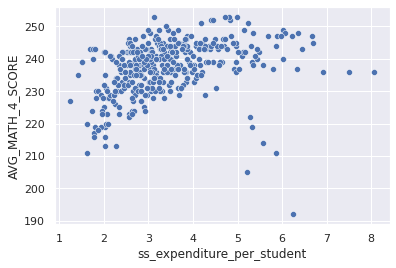

In [ ]:
sns.scatterplot(x='ss_expenditure_per_student', y='AVG_MATH_4_SCORE', data=df_math)

This correlation appears fairly strong, but it's interesting to see how closely together the data fits.

In [ ]:
filter_test_ss =  df_math[(df_math['ss_expenditure_per_student'] > 7)], df_math[(df_math['AVG_MATH_4_SCORE'] < 210)]
filter_test_ss

(      PRIMARY_KEY  ... co_expenditure_per_student
 1072  2013_ALASKA  ...                   1.897796
 1174  2015_ALASKA  ...                   2.128022
 
 [2 rows x 30 columns],
                    PRIMARY_KEY  ... co_expenditure_per_student
 416  2000_DISTRICT_OF_COLUMBIA  ...                   1.270207
 569  2003_DISTRICT_OF_COLUMBIA  ...                   2.488925
 
 [2 rows x 30 columns])

The Washington DC data from the year 2000 has appeared as an outlier in all three categories, so that data point might be worth dropping. 

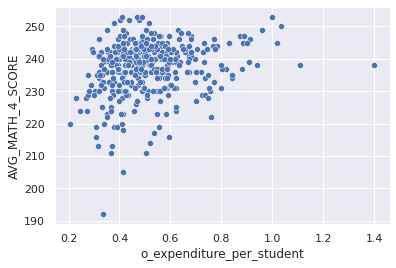

In [ ]:
sns.scatterplot(x='o_expenditure_per_student', y='AVG_MATH_4_SCORE', data=df_math)

There have been weak positive trends in most of the correlations so far, but there are further comparisons to draw between 4th and 8th grade data.

In [ ]:
filter_test_o =  df_math[(df_math['o_expenditure_per_student'] > 1.2)], df_math[(df_math['AVG_MATH_4_SCORE'] < 200)]
filter_test_o

(       PRIMARY_KEY  ... co_expenditure_per_student
 972  2011_ARKANSAS  ...                   1.254066
 
 [1 rows x 30 columns],
                    PRIMARY_KEY  ... co_expenditure_per_student
 416  2000_DISTRICT_OF_COLUMBIA  ...                   1.270207
 
 [1 rows x 30 columns])

Only two data points are unusual here, one of which is the 2000 DC data that we saw as an outlier in another variable. 

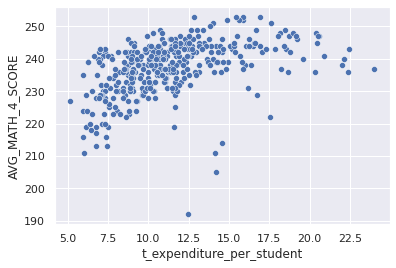

In [ ]:
sns.scatterplot(x='t_expenditure_per_student', y='AVG_MATH_4_SCORE', data=df_math)

Dispersion is relatively low but the same two points being far outside the norm in multiple variables give us a reason to run two versions of the analysis. 

In [ ]:
filter_test_t =  df_math[(df_math['AVG_MATH_4_SCORE'] < 210)]
filter_test_t

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,t_expenditure_per_student,i_expenditure_per_student,ss_expenditure_per_student,o_expenditure_per_student,co_expenditure_per_student
416,2000_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2000,70762.0,881423.0,184825.0,0.0,696598.0,858807.0,318260.0,429891.0,23107.0,87549.0,4289.0,5357.0,5830.0,3371.0,2785.0,41330.0,13781.0,68925.0,192.0,235.0,NaN,NaN,12.460022,4.617483,6.237084,0.335248,1.270207
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,406078.0,32193.0,194278.0,5168.0,5659.0,5920.0,5158.0,2971.0,45706.0,16828.0,78057.0,205.0,243.0,188.0,239.0,14.168659,6.064978,5.202327,0.412429,2.488925


In our exploration of outliers, we've only found two data points that were consistent outliers in multiple categories (DC 2000 and DC 2003). It might be worthwhile to see if there is a significant difference testing with and without those data points.

## 8th Grade Math Data

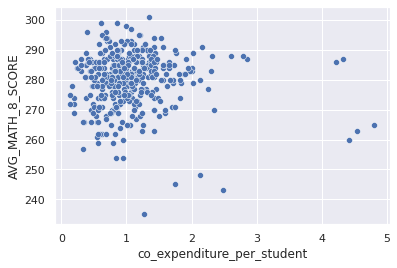

In [ ]:
sns.scatterplot(x='co_expenditure_per_student', y='AVG_MATH_8_SCORE', data=df_math)

Again, we see a similar trend here (slightly higher dispersion compared to the equivalent 4th grade correlation). 

In [ ]:
filter_test_co2 =  df_math[(df_math['co_expenditure_per_student'] > 4)], df_math[(df_math['AVG_MATH_8_SCORE'] < 250)]
filter_test_co2

(                    PRIMARY_KEY  ... co_expenditure_per_student
 917                2009_WYOMING  ...                   4.225591
 977   2011_DISTRICT_OF_COLUMBIA  ...                   4.415202
 1079  2013_DISTRICT_OF_COLUMBIA  ...                   4.806930
 1181  2015_DISTRICT_OF_COLUMBIA  ...                   4.545154
 1223               2015_WYOMING  ...                   4.322614
 
 [5 rows x 30 columns],
                    PRIMARY_KEY  ... co_expenditure_per_student
 416  2000_DISTRICT_OF_COLUMBIA  ...                   1.270207
 569  2003_DISTRICT_OF_COLUMBIA  ...                   2.488925
 671  2005_DISTRICT_OF_COLUMBIA  ...                   1.748491
 773  2007_DISTRICT_OF_COLUMBIA  ...                   2.130818
 
 [4 rows x 30 columns])

Using this method to check for potential points to remove as outliers is a nice way of seeing which data points are consistently outside the norm.

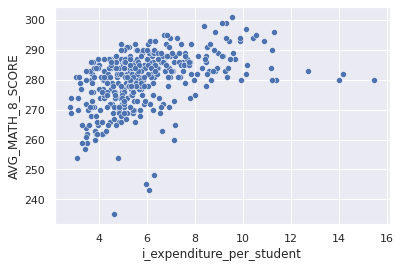

In [ ]:
sns.scatterplot(x='i_expenditure_per_student', y='AVG_MATH_8_SCORE', data=df_math)

It's also interesting to see how the general proportion of the correlations is not all that different between 4th and 8th grade even if all the 8th grade correlations are slightly weaker.

In [ ]:
filter_test_i2 =  df_math['PRIMARY_KEY'][(df_math['i_expenditure_per_student'] > 13)], df_math['PRIMARY_KEY'][(df_math['AVG_MATH_8_SCORE'] < 250)]
filter_test_i2

(1001    2011_NEW_YORK
 1103    2013_NEW_YORK
 1205    2015_NEW_YORK
 Name: PRIMARY_KEY, dtype: object, 416    2000_DISTRICT_OF_COLUMBIA
 569    2003_DISTRICT_OF_COLUMBIA
 671    2005_DISTRICT_OF_COLUMBIA
 773    2007_DISTRICT_OF_COLUMBIA
 Name: PRIMARY_KEY, dtype: object)

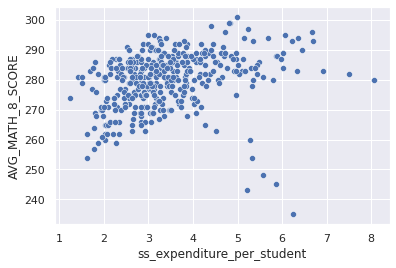

In [ ]:
sns.scatterplot(x='ss_expenditure_per_student', y='AVG_MATH_8_SCORE', data=df_math)

In [ ]:
filter_test_ss2 =  df_math['PRIMARY_KEY'][(df_math['AVG_MATH_8_SCORE'] < 250)], df_math['PRIMARY_KEY'][(df_math['ss_expenditure_per_student'] > 7)]
filter_test_ss2

(416    2000_DISTRICT_OF_COLUMBIA
 569    2003_DISTRICT_OF_COLUMBIA
 671    2005_DISTRICT_OF_COLUMBIA
 773    2007_DISTRICT_OF_COLUMBIA
 Name: PRIMARY_KEY, dtype: object, 1072    2013_ALASKA
 1174    2015_ALASKA
 Name: PRIMARY_KEY, dtype: object)

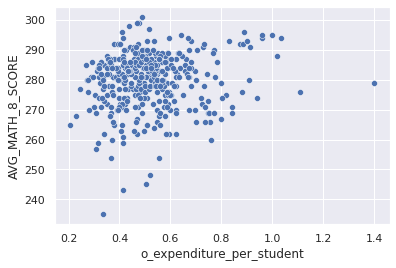

In [ ]:
sns.scatterplot(x='o_expenditure_per_student', y='AVG_MATH_8_SCORE', data=df_math)

In [ ]:
filter_test_o2 =  df_math['PRIMARY_KEY'][(df_math['o_expenditure_per_student'] > 1.2)], df_math['PRIMARY_KEY'][(df_math['AVG_MATH_8_SCORE'] < 250)]
filter_test_o2

(972    2011_ARKANSAS
 Name: PRIMARY_KEY, dtype: object, 416    2000_DISTRICT_OF_COLUMBIA
 569    2003_DISTRICT_OF_COLUMBIA
 671    2005_DISTRICT_OF_COLUMBIA
 773    2007_DISTRICT_OF_COLUMBIA
 Name: PRIMARY_KEY, dtype: object)

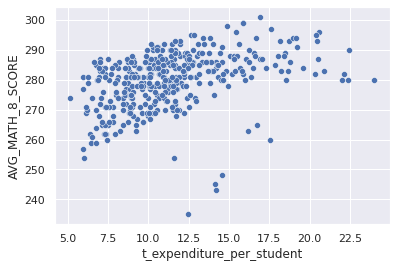

In [ ]:
sns.scatterplot(x='t_expenditure_per_student', y='AVG_MATH_8_SCORE', data=df_math)

In [ ]:
filter_test_t2 =  df_math['PRIMARY_KEY'][(df_math['AVG_MATH_8_SCORE'] < 250)]
filter_test_t2

416    2000_DISTRICT_OF_COLUMBIA
569    2003_DISTRICT_OF_COLUMBIA
671    2005_DISTRICT_OF_COLUMBIA
773    2007_DISTRICT_OF_COLUMBIA
Name: PRIMARY_KEY, dtype: object

We will run a set of correlation tests where we drop any value that has appeared on more than one of these lists. In these plots we see a similar case: the only points that we need to remove are those that were outliers on multiple lists (DC 2000, 2003, 2005, & 2007). 

## Unfiltered Statistics


In [ ]:
m_co_4 = stats.pearsonr(df_math['co_expenditure_per_student'], df_math['AVG_MATH_4_SCORE'])
print(m_co_4)

(0.027755545607226713, 0.5813678787539739)


In [ ]:
m_i_4 = stats.pearsonr(df_math['i_expenditure_per_student'], df_math['AVG_MATH_4_SCORE'])
print(m_i_4)

(0.4630930297023416, 1.6984334516648803e-22)


In [ ]:
m_ss_4 = stats.pearsonr(df_math['ss_expenditure_per_student'], df_math['AVG_MATH_4_SCORE'])
print(m_ss_4)

(0.3241151683238928, 3.6643360791869355e-11)


In [ ]:
m_o_4 = stats.pearsonr(df_math['o_expenditure_per_student'], df_math['AVG_MATH_4_SCORE'])
print(m_o_4)

(0.24612981920902294, 6.862100569443837e-07)


In [ ]:
m_t_4 = stats.pearsonr(df_math['t_expenditure_per_student'], df_math['AVG_MATH_4_SCORE'])
print(m_t_4)

(0.4388549593795138, 4.048304140981121e-20)


In [ ]:
m_co_8 = stats.pearsonr(df_math['co_expenditure_per_student'], df_math['AVG_MATH_8_SCORE'])
print(m_co_8)

(-0.020760341380234713, 0.6800557794531471)


In [ ]:
m_i_8 = stats.pearsonr(df_math['i_expenditure_per_student'], df_math['AVG_MATH_8_SCORE'])
print(m_i_8)

(0.42138789627634726, 1.607060010754846e-18)


In [ ]:
m_ss_8 = stats.pearsonr(df_math['ss_expenditure_per_student'], df_math['AVG_MATH_8_SCORE'])
print(m_ss_8)

(0.27038456181348375, 4.4334934757532036e-08)


In [ ]:
m_o_8 = stats.pearsonr(df_math['o_expenditure_per_student'], df_math['AVG_MATH_8_SCORE'])
print(m_o_8)

(0.11927660224938723, 0.017427172098561195)


In [ ]:
m_t_8 = stats.pearsonr(df_math['t_expenditure_per_student'], df_math['AVG_MATH_8_SCORE'])
print(m_t_8)

(0.39004005672736575, 7.100102144829826e-16)


The unfiltered statistics paint a pretty clear picture: that "capital outlay expenditure" has no significant correlation, but that all other categories have positive effects on kids' math test scores. 

## Filtered Statistics

First, we need to create our filtered dataframe before we re-run our correlation tests.

In [ ]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 408 to 1223
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   397 non-null    object 
 1   STATE                         397 non-null    object 
 2   YEAR                          397 non-null    int64  
 3   ENROLL                        397 non-null    float64
 4   TOTAL_REVENUE                 397 non-null    float64
 5   FEDERAL_REVENUE               397 non-null    float64
 6   STATE_REVENUE                 397 non-null    float64
 7   LOCAL_REVENUE                 397 non-null    float64
 8   TOTAL_EXPENDITURE             397 non-null    float64
 9   INSTRUCTION_EXPENDITURE       397 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  397 non-null    float64
 11  OTHER_EXPENDITURE             397 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    397 non-null    float64
 13  GR

In [ ]:
droplist = ['2000_DISTRICT_OF_COLUMBIA', '2003_DISTRICT_OF_COLUMBIA', '2005_DISTRICT_OF_COLUMBIA', '2007_DISTRICT_OF_COLUMBIA']
filtered_df_math = df_math[~df_math.PRIMARY_KEY.isin(droplist)]
filtered_df_math.info() #checking that our 4 specific entries have been dropped successfully

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 408 to 1223
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   393 non-null    object 
 1   STATE                         393 non-null    object 
 2   YEAR                          393 non-null    int64  
 3   ENROLL                        393 non-null    float64
 4   TOTAL_REVENUE                 393 non-null    float64
 5   FEDERAL_REVENUE               393 non-null    float64
 6   STATE_REVENUE                 393 non-null    float64
 7   LOCAL_REVENUE                 393 non-null    float64
 8   TOTAL_EXPENDITURE             393 non-null    float64
 9   INSTRUCTION_EXPENDITURE       393 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  393 non-null    float64
 11  OTHER_EXPENDITURE             393 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    393 non-null    float64
 13  GR

Once we've removed those 4 data points, we can run a comparative correlation analysis to see what the differences are on our results.

In [ ]:
print('new:', stats.pearsonr(filtered_df_math['co_expenditure_per_student'], filtered_df_math['AVG_MATH_4_SCORE']),  '\nold:', m_co_4)

new: (0.08806662235601709, 0.08121474156441859) 
old: (0.027755545607226713, 0.5813678787539739)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['i_expenditure_per_student'], filtered_df_math['AVG_MATH_4_SCORE']),  '\nold:', m_i_4)

new: (0.5011033767368468, 2.2477545157994426e-26) 
old: (0.4630930297023416, 1.6984334516648803e-22)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['ss_expenditure_per_student'], filtered_df_math['AVG_MATH_4_SCORE']),  '\nold:', m_ss_4)

new: (0.458214872424734, 8.525954791141162e-22) 
old: (0.3241151683238928, 3.6643360791869355e-11)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['o_expenditure_per_student'], filtered_df_math['AVG_MATH_4_SCORE']),  '\nold:', m_o_4)

new: (0.24445709093749574, 9.325742221057204e-07) 
old: (0.24612981920902294, 6.862100569443837e-07)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['t_expenditure_per_student'], filtered_df_math['AVG_MATH_4_SCORE']),  '\nold:', m_t_4)

new: (0.5114437326452428, 1.4048998357388563e-27) 
old: (0.4388549593795138, 4.048304140981121e-20)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['co_expenditure_per_student'], filtered_df_math['AVG_MATH_8_SCORE']),  '\nold:', m_co_8)

new: (0.03939875037496903, 0.4360596279281682) 
old: (-0.020760341380234713, 0.6800557794531471)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['i_expenditure_per_student'], filtered_df_math['AVG_MATH_8_SCORE']),  '\nold:', m_i_8)

new: (0.4585988022947549, 7.808203030053146e-22) 
old: (0.42138789627634726, 1.607060010754846e-18)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['ss_expenditure_per_student'], filtered_df_math['AVG_MATH_8_SCORE']),  '\nold:', m_ss_8)

new: (0.40237882998086116, 9.973509554954104e-17) 
old: (0.27038456181348375, 4.4334934757532036e-08)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['o_expenditure_per_student'], filtered_df_math['AVG_MATH_8_SCORE']),  '\nold:', m_o_8)

new: (0.10742255168224953, 0.03325842523981301) 
old: (0.11927660224938723, 0.017427172098561195)


In [ ]:
print('new:', stats.pearsonr(filtered_df_math['t_expenditure_per_student'], filtered_df_math['AVG_MATH_8_SCORE']),  '\nold:', m_t_8)

new: (0.46200704795550407, 3.5594864307987186e-22) 
old: (0.39004005672736575, 7.100102144829826e-16)


Filtering those 4 data points out strengthened the correlations we observed using the unfiltered data, affecting the support staff correlation stat much more than the others. Considering the existing observed anomalies in DC data from the reading analysis, it feels like the filtered data might give a more accurate picture of the correlations and their magnitude than the unfiltered data does. 

## Math Conclusions

*We can reject our null hypothesis: all variables besides "capital outlay expenditure" had statistically significant correlations with math performance.*

The comparison between the filtered data and the unfiltered data shows a larger magnitude in correlation from instructors and support staff, with sufficient support staff funding being almost as strongly correlated with test scores as the instructors themselves. 
From my experience as a math teacher, this conclusion is borne out by experience: support staff can help alleviate students' concerns and give students exactly what they need outside of a normal instructional setting, which is especially useful in math.  

It is also important to observe that certain kinds of expenditures have no correlation with test results despite presumably being good for the students or good for the school (capital outlay and other expenditures).

# Overall Conclusions
*1: Local revenue has the strongest significant correlation of all revenue types with reading test scores (including overall revenue). This correlation is slightly larger in 4th grade testing compared to 8th grade testing.*

*2: Expenditure on instructors has the highest correlation with increased math test scores, but it is very closely followed by support staff expenditure. Other types of expenditure had very weak and/or insignificant correlations with math test scores. Total expenditure has the largest correlation with math performance by a small margin.*

*3: Washington DC is an anomalous region and needs deeper study to understand the unique factors that influence the schools within that region.*

State and local stakeholders can use this information to draw their own conclusions regarding budget allocations; district program managers and state credentialing programs can perform further research to better understand the discovered reading correlation.